In [1]:
import scipy.io
import torch.nn as nn
import torch

# ANFIS из первого примера (200 треков)

In [2]:
sdre_mat_path = "./matlab/sdre_res.mat"
anfis_mat_path = "./matlab/nfc_res.mat"

gt_sdre = scipy.io.loadmat(sdre_mat_path)["sdre_res"]
anfis_output = scipy.io.loadmat(anfis_mat_path)["nfc_res"]

In [3]:
gt_sdre.shape, anfis_output.shape, gt_sdre.reshape(1, -1).shape, 200 * 101 * 3 * 3

((200, 101, 3, 3), (200, 101, 3, 3), (1, 181800), 181800)

In [4]:
gt_sdre = gt_sdre.reshape(1, -1)
gt_sdre = torch.Tensor(gt_sdre)

anfis_output = anfis_output.reshape(1, -1)
anfis_output = torch.Tensor(anfis_output)

In [5]:
criteria = nn.MSELoss()
criteria(anfis_output, gt_sdre)

tensor(0.0092)

# Тест на разном числе треков

In [6]:
from data_utils import split_data_to_traj_and_control, mat2tracks
import wandb
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
from pathlib import Path

In [7]:
criteria = nn.MSELoss()

In [8]:
data_root = "./data"
data_root = Path("./data")
folder_names = os.listdir(data_root)
folder_names.sort(key = lambda x: int(x.split("_")[0]))
folder_paths = [data_root / i for i in folder_names]
# folder_paths.pop(2)  # удаление неправильного файла с 50 треками
# folder_paths.pop(3)  # удаление неправильного файла с 50 треками
folder_paths

[WindowsPath('data/10_traj'),
 WindowsPath('data/25_traj'),
 WindowsPath('data/50_traj'),
 WindowsPath('data/100_traj'),
 WindowsPath('data/200_traj'),
 WindowsPath('data/500_traj'),
 WindowsPath('data/750_traj'),
 WindowsPath('data/1000_traj')]

In [9]:
# cur_dir_path =  folder_paths[0]

n_traj = []
losses = []


for cur_dir_path in folder_paths:
    sdre_mat_path = cur_dir_path / "sdre_res.mat"
    anfis_mat_path = cur_dir_path / "nfc_res.mat"

    gt_sdre = scipy.io.loadmat(sdre_mat_path)["sdre_res"]
    anfis_output = scipy.io.loadmat(anfis_mat_path)["nfc_res"]
    print(anfis_output.shape)

    gt_sdre = gt_sdre.reshape(1, -1)
    gt_sdre = torch.Tensor(gt_sdre)
    anfis_output = anfis_output.reshape(1, -1)
    anfis_output = torch.Tensor(anfis_output)

    n_traj.append(int(str(cur_dir_path).split("\\")[1].split("_")[0]))
    losses.append(criteria(anfis_output, gt_sdre).item())

(10, 101, 3, 3)
(25, 101, 3, 3)
(50, 101, 3, 3)
(100, 101, 3, 3)
(200, 101, 3, 3)
(500, 101, 3, 3)
(750, 101, 3, 3)
(1000, 101, 3, 3)


# Дополнительные данные о 100 треках

In [10]:
data_root = Path("./additional_data")
folder_names = os.listdir(data_root)
folder_names.sort(key = lambda x: int(x.split("_")[0]))
folder_paths = [data_root / i for i in folder_names]
folder_paths

add_n_traj = []
add_losses = []

for cur_dir_path in folder_paths:
    sdre_mat_path = cur_dir_path / "sdre_res.mat"
    anfis_mat_path = cur_dir_path / "nfc_res.mat"

    gt_sdre = scipy.io.loadmat(sdre_mat_path)["sdre_res"]
    anfis_output = scipy.io.loadmat(anfis_mat_path)["nfc_res"]
    print(anfis_output.shape)

    gt_sdre = gt_sdre.reshape(1, -1)
    gt_sdre = torch.Tensor(gt_sdre)
    anfis_output = anfis_output.reshape(1, -1)
    anfis_output = torch.Tensor(anfis_output)

    add_n_traj.append(int(str(cur_dir_path).split("\\")[1].split("_")[0]))
    add_losses.append(criteria(anfis_output, gt_sdre).item())

(10, 101, 3, 3)
(10, 101, 3, 3)
(25, 101, 3, 3)
(25, 101, 3, 3)
(50, 101, 3, 3)
(50, 101, 3, 3)
(100, 101, 3, 3)
(100, 101, 3, 3)
(100, 101, 3, 3)
(200, 101, 3, 3)
(200, 101, 3, 3)
(500, 101, 3, 3)
(500, 101, 3, 3)
(750, 101, 3, 3)
(750, 101, 3, 3)
(1000, 101, 3, 3)
(1000, 101, 3, 3)


In [11]:
add_losses, add_n_traj

([0.03712207451462746,
  0.01971006765961647,
  0.014389704912900925,
  0.02496352419257164,
  0.011660823598504066,
  0.017681898549199104,
  0.008708293549716473,
  0.008708293549716473,
  0.01116246823221445,
  0.012612917460501194,
  0.009829279966652393,
  0.010330118238925934,
  0.010158308781683445,
  0.01118229329586029,
  0.01096278429031372,
  0.00990494154393673,
  0.010224160738289356],
 [10,
  10,
  25,
  25,
  50,
  50,
  100,
  100,
  100,
  200,
  200,
  500,
  500,
  750,
  750,
  1000,
  1000])

# Визуализация

Text(0, 0.5, 'MSE ANFIS на валидации')

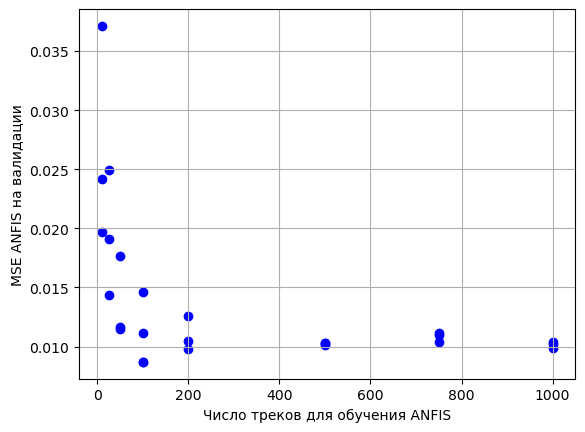

In [12]:
# n_traj[2] = 100
plt.scatter(n_traj, losses, c="b")
plt.scatter(add_n_traj, add_losses, c="b")

# plt.plot(n_traj, losses, "--")
plt.grid()
plt.xlabel("Число треков для обучения ANFIS")
plt.ylabel("MSE ANFIS на валидации")

In [13]:
all_losses = losses + add_losses
all_traj = n_traj + add_n_traj

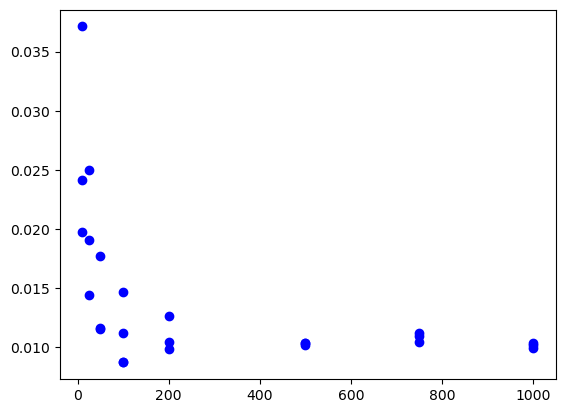

In [14]:
plt.scatter(all_traj, all_losses, c="b")

In [15]:
import statistics
from math import sqrt

def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.25):
    mean = statistics.mean(values)
    stdev = statistics.stdev(values)
    confidence_interval = z * stdev / sqrt(len(values))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, mean, 'o', color='#f44336')

    return mean, confidence_interval

In [16]:
all_traj

[10,
 25,
 50,
 100,
 200,
 500,
 750,
 1000,
 10,
 10,
 25,
 25,
 50,
 50,
 100,
 100,
 100,
 200,
 200,
 500,
 500,
 750,
 750,
 1000,
 1000]

Text(0.5, 1.0, 'Дисперсия качества ANFIS')

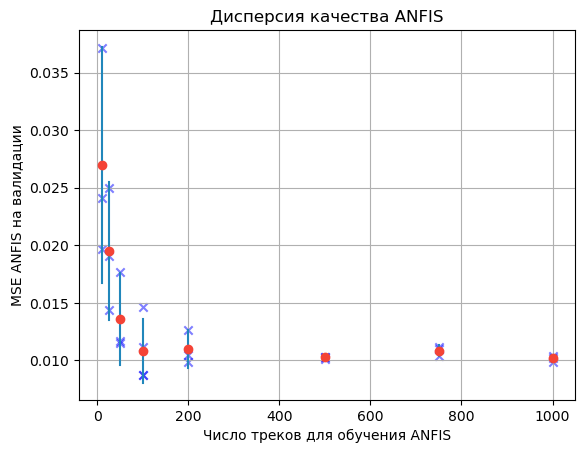

In [17]:
losses_array = np.vstack((all_traj ,all_losses))

plt.figure()

for n_tr in set(all_traj):
    values = losses_array[1, :][losses_array[0, :] == n_tr]
    plot_confidence_interval(n_tr, values)
    

plt.scatter(all_traj, all_losses, marker="x", c="b",alpha=0.5)

plt.grid()

plt.xlabel("Число треков для обучения ANFIS")
plt.ylabel("MSE ANFIS на валидации")
plt.title("Дисперсия качества ANFIS")
# plt.yscale("log")

In [20]:
import pickle

save_data = {"n_traj" : all_traj, 
             "losses" : all_losses}

with open("all_anfis_stats.pickle", 'wb') as handle:
    pickle.dump(save_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
# import pickle

# save_data = {"n_traj" : n_traj, 
#              "losses" : losses}

# with open("anfis_stats.pickle", 'wb') as handle:
#     pickle.dump(save_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
# import pickle

# save_data = {"n_traj" : add_n_traj, 
#              "losses" : add_losses}

# with open("add_anfis_stats.pickle", 'wb') as handle:
#     pickle.dump(save_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [23]:
# with open("anfis_stats.pickle", 'rb') as handle:
#     unserialized_data = pickle.load(handle)

# unserialized_data